In [1]:
import numpy as np
import matplotlib.pyplot as plt

PermissionError: [Errno 13] Permission denied: 'figures/line_search.pdf'

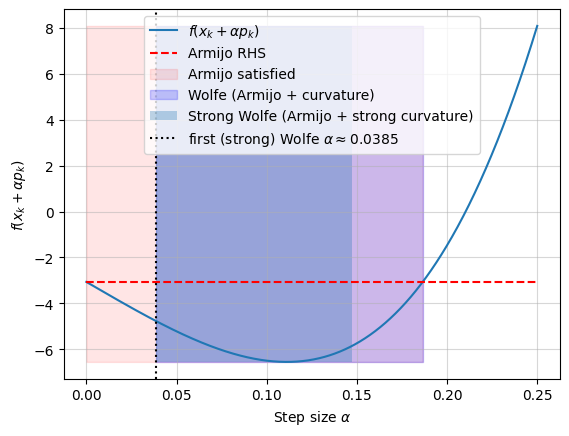

In [2]:
# Function and gradient
def f(x):
    return x**4 - 3*x**3 + 2

def grad_f(x):
    return 4*x**3 - 9*x**2

# Start at x0 = 1.5 (your example)
x0 = 1.5
g0 = grad_f(x0)
p = -g0  # steepest-descent direction; here p > 0

# Wolfe parameters
c1 = 1e-4
c2 = 0.9

# Alpha grid
alphas = np.linspace(0.0, 0.25, 800)
x_line = x0 + alphas * p
f_line = f(x_line)

# Armijo RHS (sufficient decrease line)
armijo_rhs = f(x0) + c1 * alphas * g0 * p

# Directional derivatives
dirder0 = g0 * p
dirder_line = grad_f(x_line) * p

# Conditions
armijo_ok = f_line <= armijo_rhs
wolfe_ok = dirder_line >= c2 * dirder0                      # (standard) curvature condition
strong_wolfe_ok = np.abs(dirder_line) <= c2 * abs(dirder0)  # strong curvature condition

both_wolfe = armijo_ok & wolfe_ok
both_strong = armijo_ok & strong_wolfe_ok

# Locate first alpha that satisfies each
alpha_armijo = alphas[armijo_ok.argmax()] if armijo_ok.any() else None
alpha_wolfe = alphas[both_wolfe.argmax()] if both_wolfe.any() else None
alpha_strong = alphas[both_strong.argmax()] if both_strong.any() else None

# Plot
plt.plot(alphas, f_line, label=r'$f(x_k + \alpha p_k)$')
plt.plot(alphas, armijo_rhs, linestyle='--', label='Armijo RHS', color='red')

# Shade regions
plt.fill_between(alphas, f_line.min(), f_line.max(), where=armijo_ok, alpha=0.1, label='Armijo satisfied', color='red')
plt.fill_between(alphas, f_line.min(), f_line.max(), where=both_wolfe, alpha=0.2, label='Wolfe (Armijo + curvature)', color='blue')
plt.fill_between(alphas, f_line.min(), f_line.max(), where=both_strong, alpha=0.3, label='Strong Wolfe (Armijo + strong curvature)')

# Mark the first acceptable alphas (if any)
if alpha_armijo is not None and alpha_armijo > 0:
    plt.axvline(alpha_armijo, linestyle=':', label=rf'first Armijo $\alpha \approx {alpha_armijo:.4f}$')
#if alpha_wolfe is not None and alpha_wolfe > 0:
#    plt.axvline(alpha_wolfe, linestyle='-.', label=rf'first Wolfe $\alpha \approx {alpha_wolfe:.4f}$')
if alpha_strong is not None and alpha_strong > 0:
    plt.axvline(alpha_strong, linestyle=':', label=rf'first (strong) Wolfe $\alpha \approx {alpha_strong:.4f}$', color='k')

plt.xlabel(r'Step size $\alpha$')
plt.ylabel(r'$f(x_k + \alpha p_k)$')
plt.legend(loc='upper center')
plt.grid(alpha=0.5)

plt.savefig('figures/line_search.pdf', bbox_inches='tight')